In [73]:
#pip install sklearn.model_selection


In [74]:
#pip install scikit-learn

In [75]:
#pip install tqdm

In [1]:
#Importing required libraries

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import tensorflow as tf


import numpy as np #
import pandas as pd 
from tqdm import tqdm
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
# from keras import regularizers
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img

In [2]:
#reading labels csv file

labels = pd.read_csv('./DogVision/labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
#describe
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [79]:
# #total unique breeds

# labels['breed'].nunique()

**Observation:**
1. We have total 120 unique breeds
2. We have atleast 60 images per category of breed
3. Google recommends at least 10 images per class to get a better model
4. More sample available ----- > More efficeint the model will be

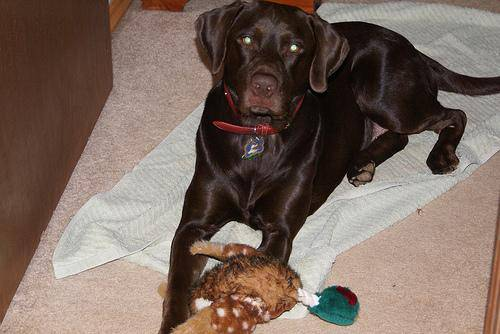

In [4]:
# Lets check one image
from IPython.display import display, Image
Image("./DogVision/train/43572ba7edf772a95f539e57afd9eb43.jpg")

In [5]:
import os
if len(os.listdir('./DogVision/train/')) == len(labels['id']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')

Number of file matches number of actual images!


In [6]:

#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))

#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num


Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

**One-hot Encoding:**
Since the output of our predictor for each input is a vector of probabilities for each class we must convert out label dataset to be the same format. That is for each input a row vector of length num_classes with a 1 at the index of the label and 0's everywhere else.

In [7]:

input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images,y

In [8]:
X,y = images_to_array('./DogVision/train', labels[:])

  0%|          | 0/10222 [00:00<?, ?it/s]

100%|██████████| 10222/10222 [01:56<00:00, 87.88it/s]


In [9]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [86]:
## Another way to create one hot encoded vectors
# dummy = pd.get_dummies(df_50['breed'])

# classes = dummy.columns 
# print('we have total {} number of unique dog breeds'.format(len(classes)))

#convert this into np.array

# y = np.array(dummy)
# # we can delete the dummy because we dont need it anymore ----- > We are saving RAM

# del dummy

# y[0:2]

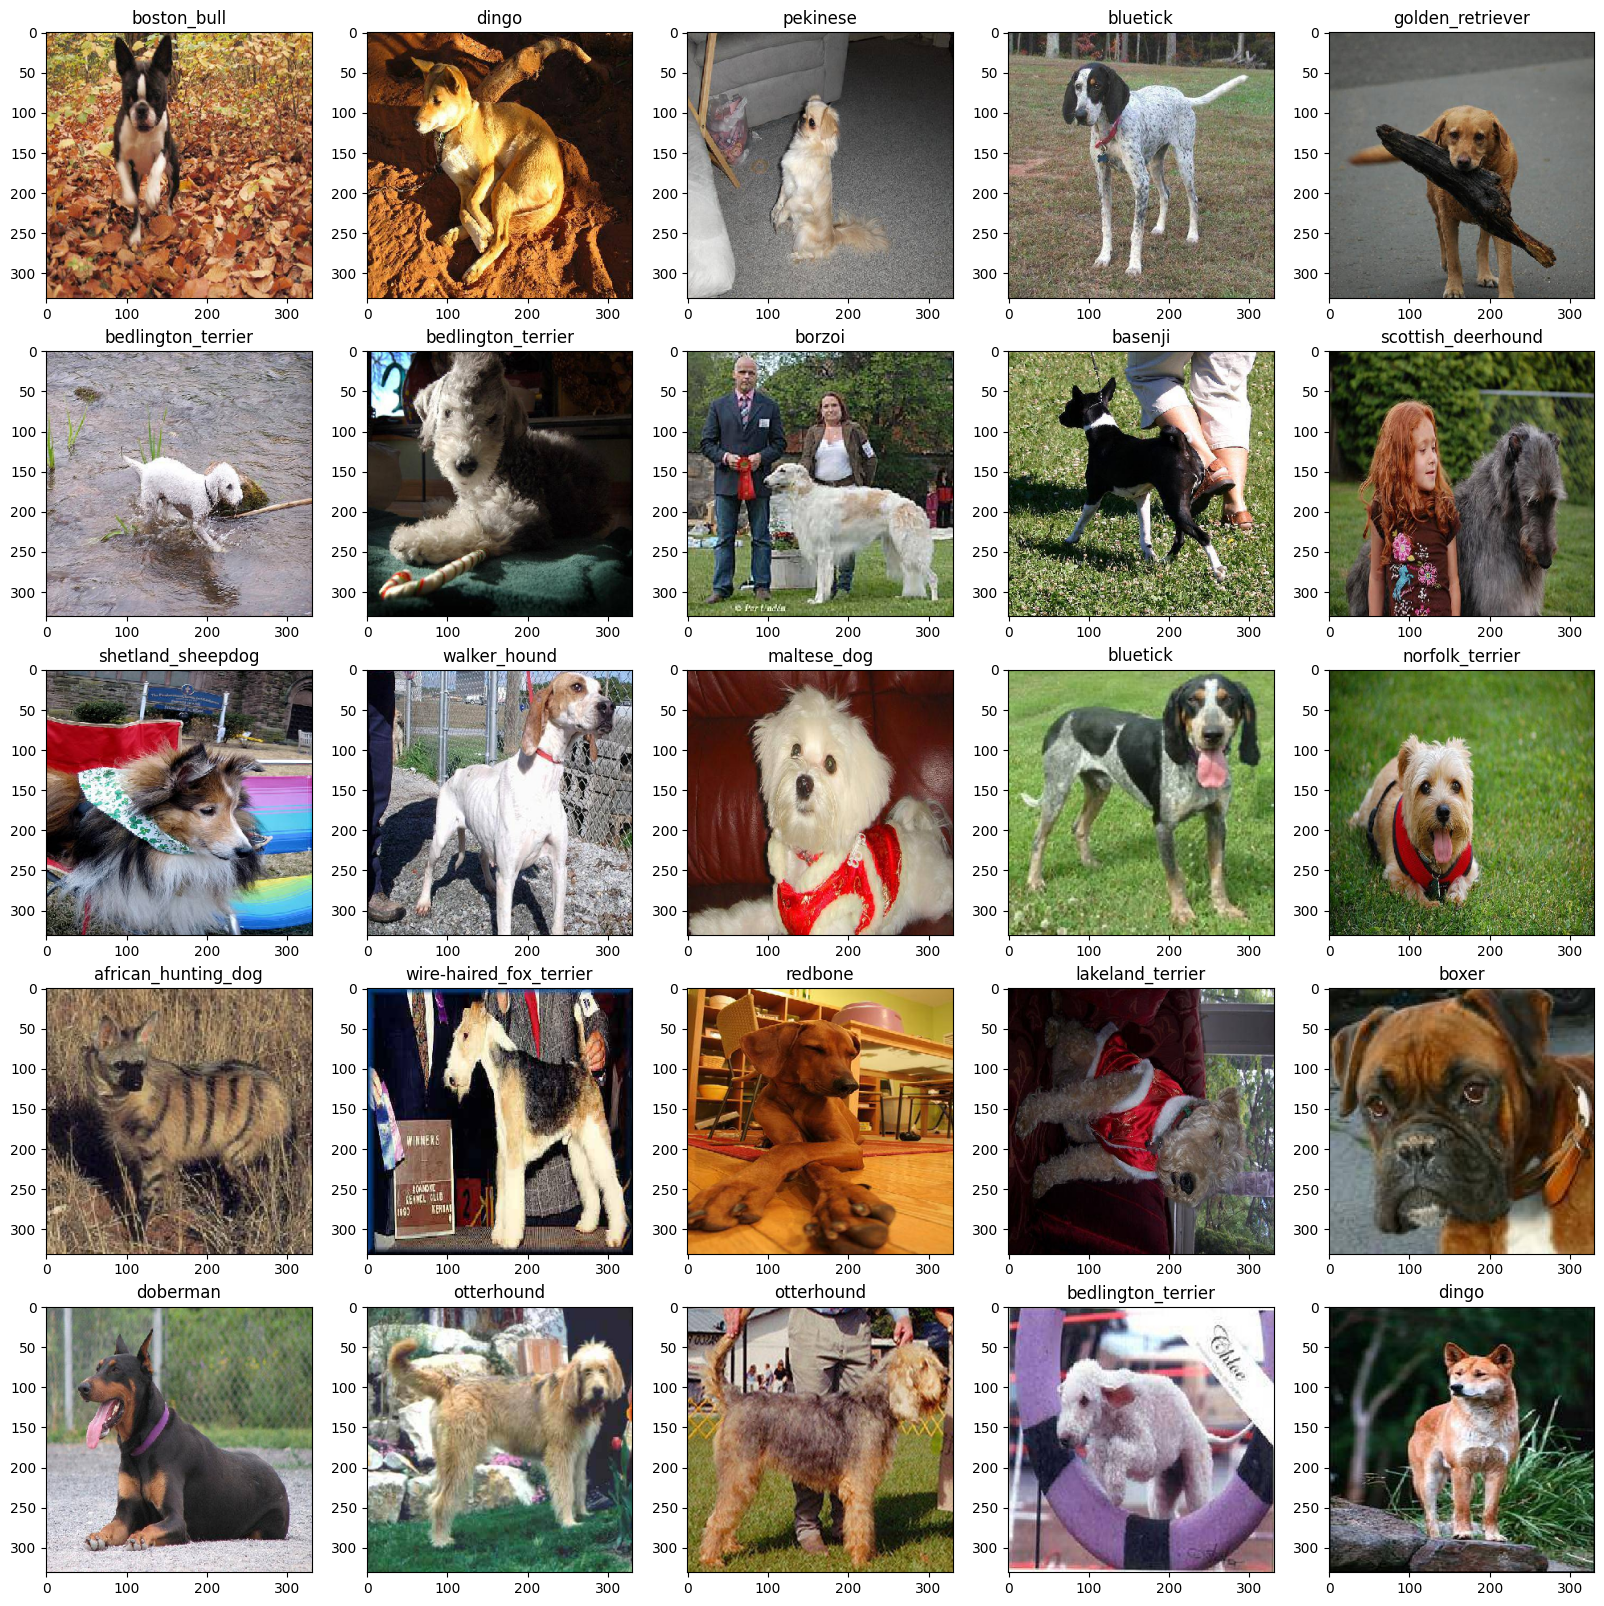

In [10]:
# np.where(y[5]==1)[0][0]

# lets check some dogs and their breeds
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image
    

### Creating callbacks:

(things to help our model)

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.

In [11]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [12]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

# Model Building:

* The basic idea here is to extract features from the data set from pretrained models and create a simple deep net by using all those features combined.
* So we will GlobalAveragePooling2D to extract a pooled output from our selected models
* img_size = You can change this shape according to the documentation of the pretrained model
* Keras documentation for all models: https://keras.io/api/applications/



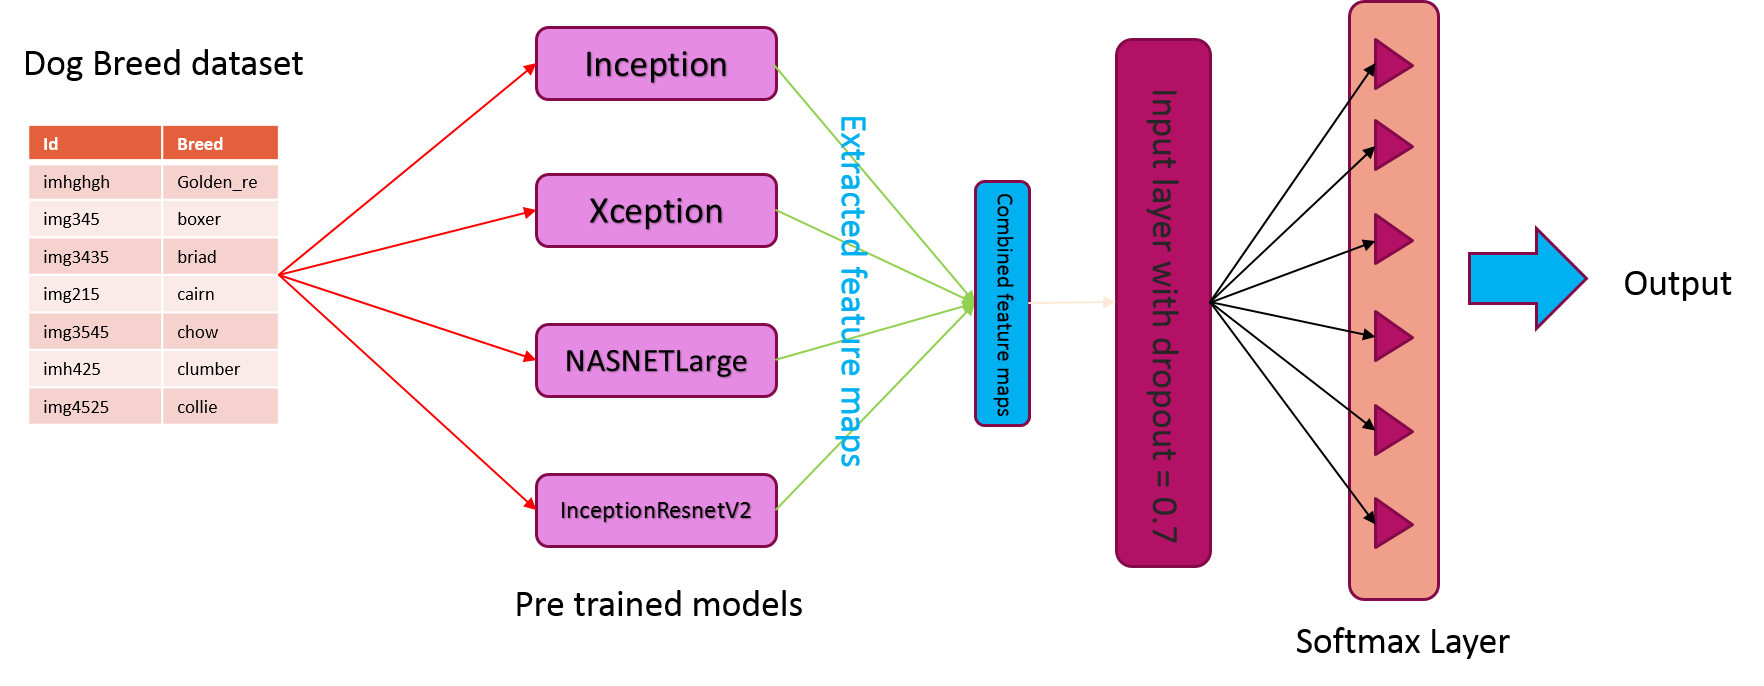

In [13]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [14]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)


320/320 ━━━━━━━━━━━━━━━━━━━━ 815s 3s/step
Feature maps shape:  (10222, 2048)


In [15]:
# Extract features using Xception 
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

320/320 ━━━━━━━━━━━━━━━━━━━━ 1692s 5s/step
Feature maps shape:  (10222, 2048)


In [16]:
#del X #to free up some ram memory
import gc
gc.collect()

84065

In [17]:
#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 ], axis=-1) #axis=-1 to concatenate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 4096)


In [18]:
import numpy as np

# Check for None values in final_features
print(np.any(np.isnan(final_features)))

# Check for None values in y
print(np.any(np.isnan(y)))


False
False


In [19]:
#Prepare Deep net

model = Sequential()
model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax')) #Output Layer

c:\python3.11.3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\python3.11.3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

In [21]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [22]:
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5272 - loss: 2.2300 - val_accuracy: 0.9056 - val_loss: 0.3063 - learning_rate: 0.0010
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8772 - loss: 0.4411 - val_accuracy: 0.8963 - val_loss: 0.3562 - learning_rate: 0.0010
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8856 - loss: 0.4083 - val_accuracy: 0.9007 - val_loss: 0.3533 - learning_rate: 0.0010
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8977 - loss: 0.3737
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8977 - loss: 0.3739 - val_accuracy: 0.9056 - val_loss: 0.3975 - learning_rate: 0.0010
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9132 - loss: 0.3111 - val_accuracy: 0.9139 - val_loss: 0.3430 - learning_rate: 1.0000e-05
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9226 - loss: 0.2560 - val

In [23]:
import gc
gc.collect()

714

In [24]:
model.save('DogPred_Model.h5')

In [25]:
acc,loss=model.evaluate(final_features,y)

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9817 - loss: 0.0523


In [26]:
#deleting to free up ram memory

del inception_features
del xception_features
del final_features
gc.collect() 

353

In [ ]:
# sample_df = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')

In [ ]:
# sample_df.shape

In [27]:
#Function to read images from test directory
#
import os
import numpy as np
import tqdm as  tqdm
def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    
    for ix,img_dir in enumerate(test_filenames):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images
img_size=(331,331,3)
test_data = images_to_array_test('./DogVision/test/', img_size)

Ouptut Data Size:  (10357, 331, 331, 3)


In [28]:
test_data.shape


(10357, 331, 331, 3)

In [29]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

from keras.applications.xception import Xception,preprocess_input




In [32]:
#Extract test data features.
import gc

def extact_features(data):
    inception_features = get_features(InceptionV3, preprocess_input, img_size, data)
    xception_features = get_features(Xception, preprocess_input, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     ],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory

    return final_features

test_features = extact_features(test_data)

324/324 ━━━━━━━━━━━━━━━━━━━━ 831s 3s/step
Feature maps shape:  (10357, 2048)
324/324 ━━━━━━━━━━━━━━━━━━━━ 1701s 5s/step
Feature maps shape:  (10357, 2048)
Final feature maps shape (10357, 4096)


In [33]:
test_features.shape

(10357, 4096)

In [34]:
#Free up some space.
del test_data
gc.collect()

84329

In [35]:
from tensorflow.keras.models import load_model

In [36]:
#Predict test labels given test data features.
model=load_model('DogPred_Model.h5')
pred = model.predict(test_features)

324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [37]:
# First prediction
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[1.56621757e-10 2.59241212e-10 8.91391128e-12 3.45157826e-11
 1.28091045e-11 2.31404175e-12 6.82214430e-13 7.58459962e-12
 4.98880104e-12 1.92315712e-11 1.10564925e-11 6.49191118e-11
 5.43472933e-10 4.03540046e-09 1.48863942e-11 1.70196461e-11
 2.47309170e-11 7.12790992e-13 1.45184739e-10 6.05936523e-10
 1.76512038e-12 4.73245644e-11 2.55221222e-09 1.34598291e-10
 2.06667270e-11 2.18317066e-11 1.03800107e-12 4.46117232e-12
 6.34885482e-13 1.43390499e-09 1.40506738e-11 5.57197621e-11
 6.83189061e-11 1.26313474e-10 4.65094283e-12 1.23728100e-12
 4.60558848e-11 1.57646585e-12 3.79193864e-11 1.17934676e-10
 1.62864167e-11 1.82025974e-11 1.39538936e-10 1.56722656e-11
 4.76822783e-11 4.96126862e-10 3.55365251e-11 3.84990512e-11
 1.01679949e-11 2.80849205e-10 4.49520386e-11 1.27945024e-11
 1.12748894e-10 6.94500924e-12 2.02313496e-11 1.72629879e-11
 3.09625381e-11 1.23338891e-11 5.68948361e-12 4.29379535e-12
 4.65524945e-11 9.99442279e-01 1.61087921e-09 7.11013551e-13
 2.72394225e-11 3.730196

In [38]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(classes))
preds_df.head()


Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [39]:
# Append test image ID's to predictions DataFrame
test_path = "Images/"
images_path = os.listdir(test_path)
preds_df["id"] = [os.path.splitext(path)[0] for path in images_path]
#preds_df.head()
df = preds_df.dropna(axis=1)
print(df)

           id
0           1
1        chow
2    doberman
3         lab
4  rottweiler
5    shih-tzu


# Testing with custom input:

In [41]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.preprocessing.image import load_img




In [53]:
img_size = (331,331,3)
#reading the image and converting it into an np array
img_g = load_img('Images/mini2.jpg',target_size = img_size)
img_g = np.expand_dims(img_g,axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [51]:
img_g.shape

(1, 331, 331, 3)

# OUTPUT

In [54]:
# #Predict test labels given test data features.
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg)]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Feature maps shape:  (1, 2048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature maps shape:  (1, 2048)
Final feature maps shape (1, 4096)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label: beagle
Probability of prediction): 100 %
